<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_6%EC%A1%B0_%EB%B3%B5%EC%8A%B5%EA%B3%BC%EC%A0%9C_%EB%AC%B8%EC%A0%9C_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/비타민/2학기/1week/비타민_딥러닝 개요_6조_복습과제

/content/drive/MyDrive/비타민/2학기/1week/비타민_딥러닝 개요_6조_복습과제


# 딥러닝 개요_복습 프로젝트_6조

# * 참고. 문제가 여기저기 있어서 찾기 힘드시면 'ctrl+f'로 '문제'라고 검색해서 작성해주세요! *

# 0. 개념 문제

# 0.1. 다층 퍼셉트론으로 XOR 문제 해결하기

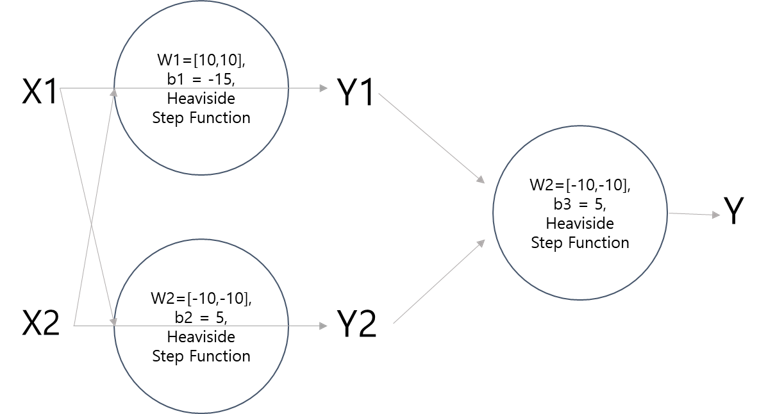

In [4]:
from IPython.display import Image
Image('MLPforXOR.png')

Q. 이때, X1=1, X2=1일 경우 XOR을 만족하는 것을 간단한 풀이과정으로 보여주세요

A.
* Y1 = step(10 * 1 + 10 * 1 - 15) = step(5) = 1 
* Y2 = step(-10 * 1 -10 * 1 + 5) = step(-15) = 0
* Y = step(-10 * 1 -10 * 0 + 5) = step(-5) = 0

--> XOR 만족 

# 0.2. MLP와 행렬 차원 및 파라미터 수

통과 뉴런 5개로 구성된 입력층, 뉴럽 10개로 구성된 은닉층, 뉴럽 2개로 구성된 출력 층으로 이루어진 다층 퍼셉트론이 있다고 가정합시다. 이때, 모든 뉴런은 ReLU 활성화 함수를 사용합니다.<br>

1. 입력행렬 X에서 행의 크기는 무엇을 의미하나요? <br>
3. 가중치와 편향값은 총 몇 개가 있나요? <br>

답: <br>
1. batchsize
2. 가중치 : 70개, 편향값 : 12개

# 1. 분류를 위한 MLP모델 <br>
 - [목표] MLP 모델을 학습 과정에서 모델을 수정하는 것 학습해 볼까요?

make_circles 함수를 통해서 데이터를 생성하고 MLP를 통해서 분류 문제를 해결하려고 합니다! 빈칸을 채워주세요!

In [5]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

우선, 이진분류를 위해서 2차원을 가진 1000개의 데이터를 만들었습니다.

In [6]:
from sklearn.datasets import make_circles

X, y = make_circles(1000, 
                    noise=0.03, 
                    random_state=42)

In [7]:
# 레이블이 제대로 형성되었는지 확인하겠습니다
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [8]:
# 데이터가 제대로 형성되었는 확인해보겠습니다
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [9]:
# 대칭적인 레이블이 형성된 것을 확인할 수 있습니다.
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

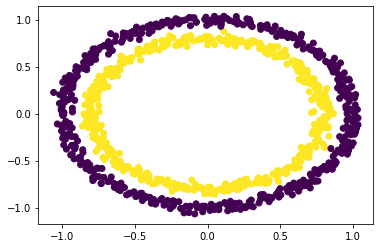

In [10]:
# 형성한 데이터를 산점도로 확인해볼까요
plt.scatter(X[:, 0], X[:, 1], c=y);

In [11]:
# 학습 데이터와 테스트 데이터 분리하겠습니다
X_train, y_train = X[:800], y[:800] 
X_test, y_test = X[800:], y[800:] 

# 개수 확인
X_train.shape, X_test.shape

((800, 2), (200, 2))

아래 함수는 추후 시각화에 필요한 함수이기 때문에 실행해주세요!

In [12]:
import numpy as np

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
    
    # 경계선
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

## 저희 목적은 다층신경망 모델(MLP)로 제대로 이진 분류를 하는 것입니다! 아래 빈칸을 채워주세요

## 문제 1.1.

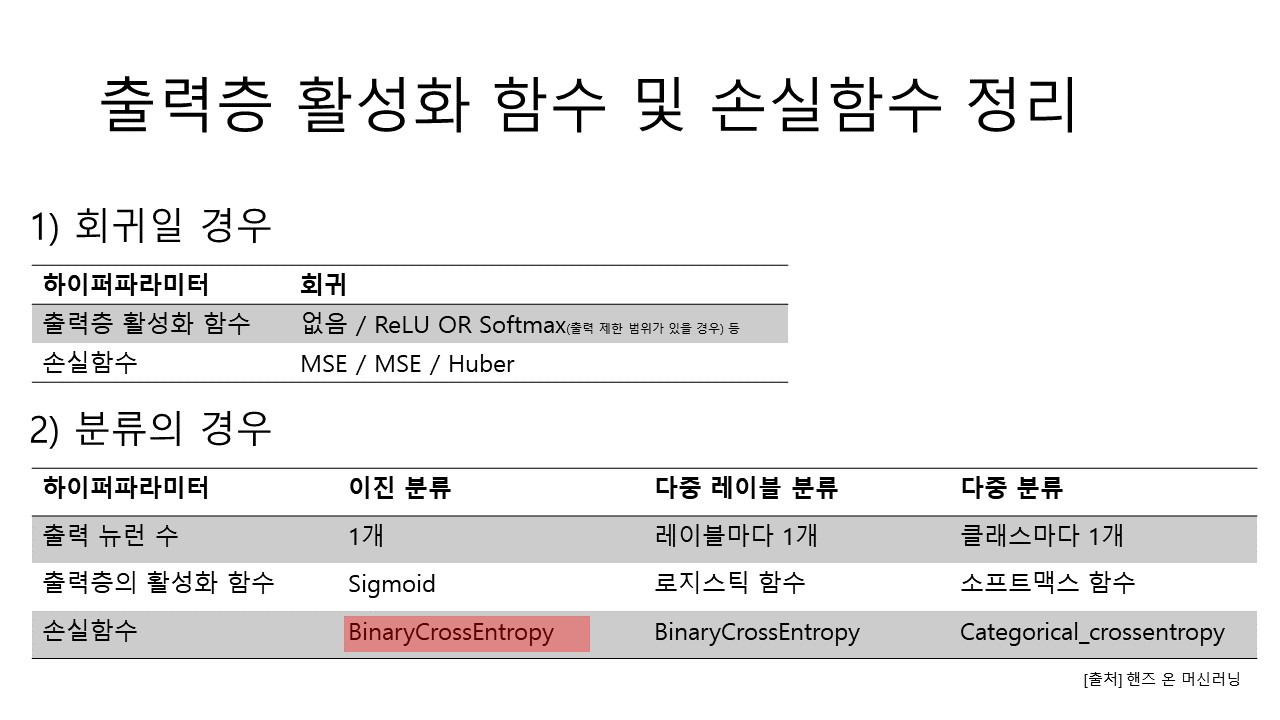

In [13]:
# 아래 loss 매개변수를 채우실 때 참고해주세요
from IPython.display import Image
Image('evalution1.png')

In [16]:
tf.random.set_seed(42)

# 일단 먼저 모델을 만들어볼까요
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4), 
  tf.keras.layers.Dense(4), 
  tf.keras.layers.Dense(1) 
])


# 손실함수와 옵티마이저를 설정해보겠습니다
model_1.compile(loss='binary_crossentropy', #문제 이진 분류인데 어떤 손실함수가 들어가는 것이 좋을까요?#
                optimizer='sgd',#문제 우선, 옵티마이저 함수로 SGD를 넣어볼까요?#
                metrics=['accuracy'])

# 학습 시켜보겠습니다
model_1.fit(X_train, y_train, epochs=1) #문제, epochs=1로 학습시켜주세요#

25/25 [==============================] - 1s 3ms/step - loss: 1.2538 - accuracy: 0.4650


doing binary classifcation...


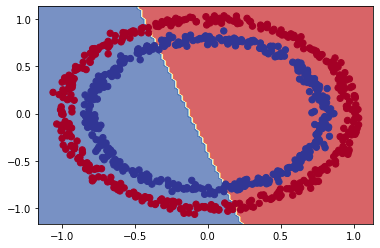

In [17]:
# 시각화
plot_decision_boundary(model_1, X_train, y_train)

## 문제 1.2. 흠... 원으로 분류를 해야하는데 직선으로 분류가 되어있네요... 뭐가 문제인 것 같은신가요?
## 힌트. 각 노드에서 어떤 부분이 빠져있는지 확인해주세요.

## 답: 활성화함수

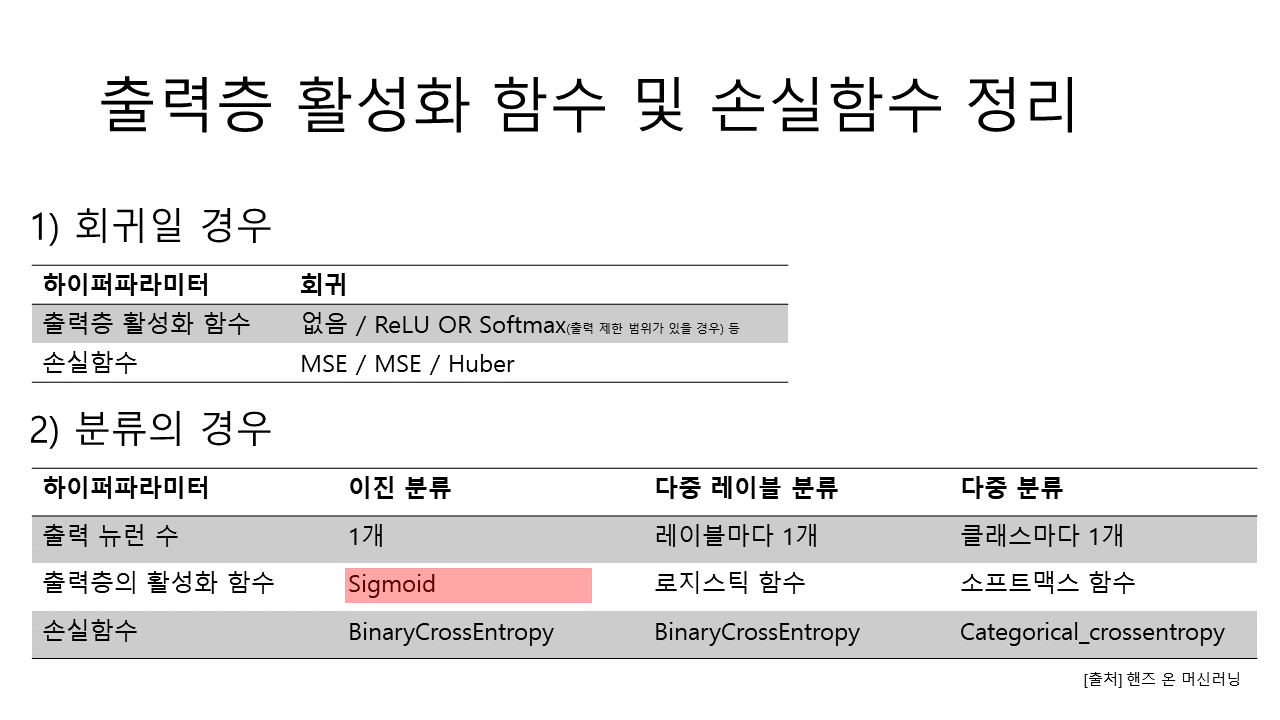

In [ ]:
# 아래 출력층 활성화 함수를 채울 때 참고해주세요!
from IPython.display import Image
Image('evalution2.png')

 ## 문제. 그렇다면 아래에 relu함수를 넣어주세요!

In [22]:
tf.random.set_seed(42)

# 모델 설정
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'), #문제. 위 조건에 따라서 비활성화 함수를 넣어주세요#
  tf.keras.layers.Dense(4, activation='relu'), #문제. 위 조건에 따라서 비활성화 함수를 넣어주세요#
  tf.keras.layers.Dense(1, activation='sigmoid') # 문제 마지막 출력층에는 어떤 함수가 들어가는 것이 좋을까요#
])

model_2.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

# 모델 학습
model_2.fit(X_train, y_train, epochs=1)

25/25 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.4950


doing binary classifcation...


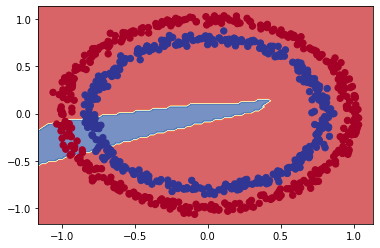

In [23]:
# 시각화
plot_decision_boundary(model_2, X_train, y_train)

## 문제 1.3. accuracy가 50%로 매우 낮은 정확도를 보입니다? epoch를 늘려볼까요? epochs를 1에서 200으로 늘려주세요!

In [24]:
#문제 epochs를 200개로 늘려주세요!#
tf.random.set_seed(42)

# 모델 설정
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'), 
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

# 모델 학습
model_3.fit(X_train, y_train, epochs= 200) #문제 빈칸을 채워주세요#

Epoch 1/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4950
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.4963
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5125
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5200
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5138
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5188
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5238
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5300
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5350
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.5387
Epoch 11/

doing binary classifcation...


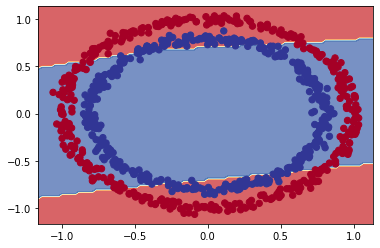

In [25]:
# 시각화
plot_decision_boundary(model_3, X_train, y_train)

## 문제 1.4. 여전히 좋지 않네요... 도대체 뭐가 문제일까요? optimizer를 바꿔볼까요?
## optimizer을 SGD에서 Adam으로 바꿔주세요

In [26]:
#문제 옵티마이저 함수를 Adam으로 바꿔주세요!#
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer='adam', #문제#
                metrics=['accuracy'])

history = model_4.fit(X_train, y_train, epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 3ms/step - loss: 0.6920 - accuracy: 0.4975
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5138
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5175
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.5200
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5300
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5350
Epoch 7/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6810 - accuracy: 0.5400
Epoch 8/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5400
Epoch 9/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.5425
Epoch 10/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6795 - accuracy: 0.5387
Epoch 11/

doing binary classifcation...


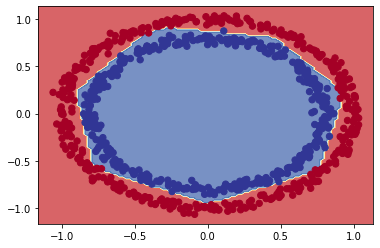

In [27]:
plot_decision_boundary(model_4, X_train, y_train)

In [28]:
loss, accuracy = model_4.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1051 - accuracy: 0.9900
Model loss on the test set: 0.1050591841340065
Model accuracy on the test set: 99.00%


doing binary classifcation...
doing binary classifcation...


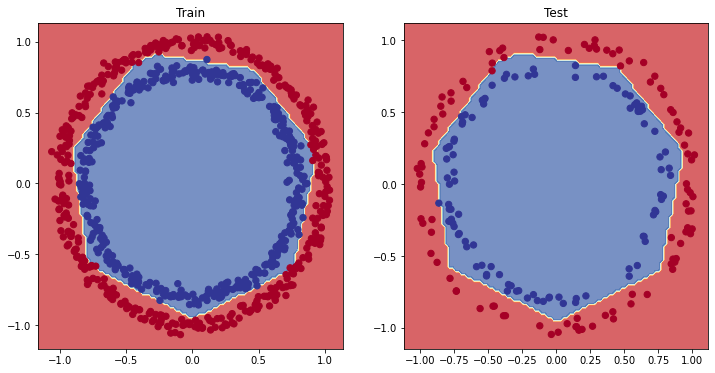

In [29]:
# 학습데이터와 테스트 데이터가 잘 분류되었는지 산점도로 확인해볼까요?

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X=X_test, y=y_test)
plt.show()

In [30]:
# epoch마다 확인할 수 있습니다
pd.DataFrame(history.history)

,loss,accuracy
0,0.692022,0.49750
1,0.687350,0.51375
2,0.684560,0.51750
3,0.683247,0.52000
4,0.682328,0.53000
...,...,...
195,0.123930,0.98625
196,0.122339,0.98625
197,0.121165,0.98750
198,0.119828,0.98625


Text(0.5, 1.0, 'Model_4 training curves')

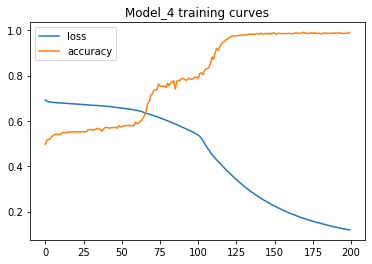

In [31]:
# 정확도 및 Loss curve를 표현해볼까요 실행시켜주세요
pd.DataFrame(history.history).plot()
plt.title("Model_4 training curves")

# 2. 회귀를 위한 MLP

 - 이번에는 회귀를 MLP를 통해서 풀어볼까요?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.utils import get_file, plot_model
import warnings
warnings.filterwarnings('ignore')
# plot_model: 시각화, get_file로 외부 데이터

In [ ]:
# 데이터를 외부에서 불러오겠습니다!
dataset_path = get_file('auto-mpg.data','http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration',
               'Model Year','Origin']

In [ ]:
raw_dataset = pd.read_csv(dataset_path,names=column_names,
                          na_values = '?',comment='\t',
                          sep=' ',skipinitialspace=True)

dataset= raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
# 결측치 확인
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

## 문제 2.1. 결측치를 가진 열을 모두 날려주세요

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

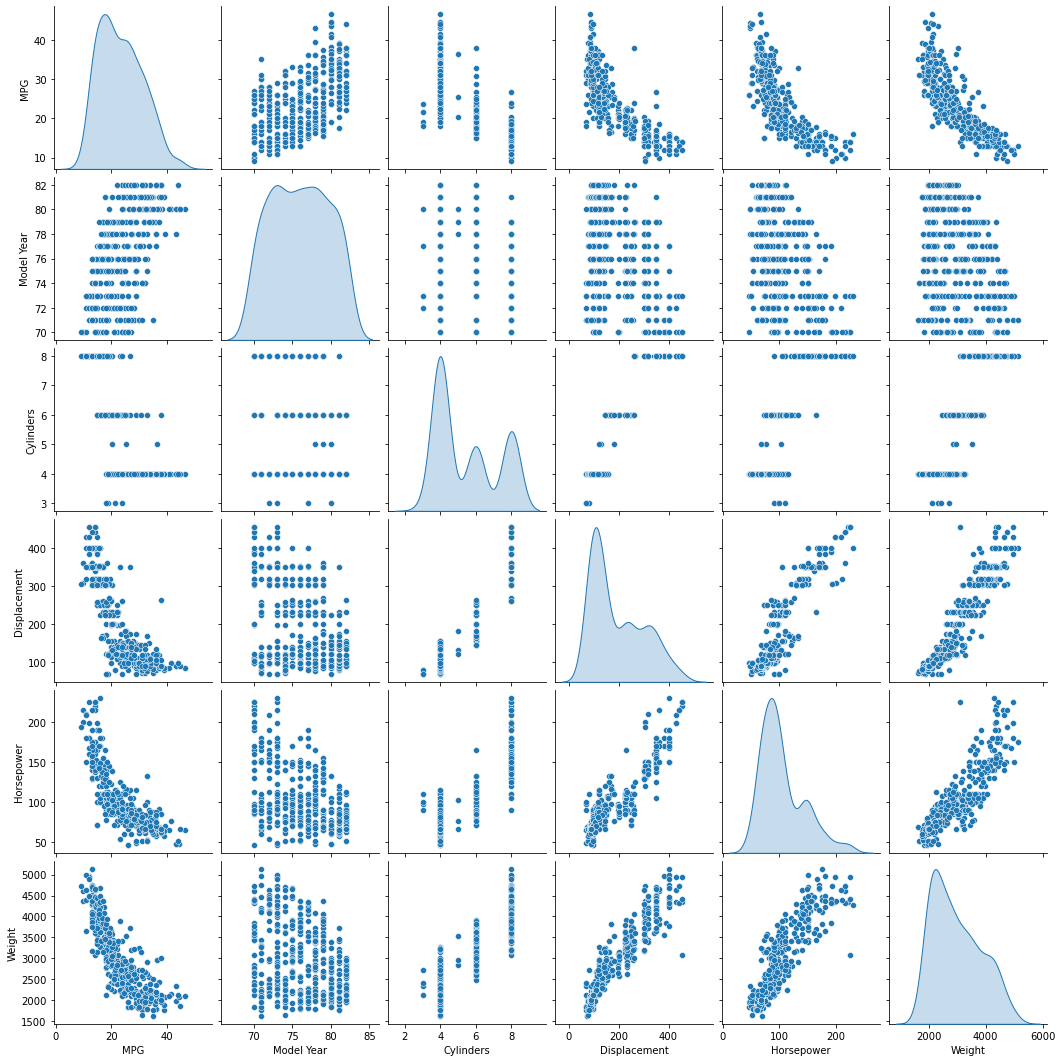

In [ ]:
# EDA를 진행해보겠습니다
sns.pairplot(dataset[['MPG','Model Year','Cylinders','Displacement','Horsepower','Weight']],diag_kind='kde')

In [ ]:
#Origin이라는 속성만 원핫인코딩을 진행하겠습니다.
dataset['Origin'].unique()

array([1, 3, 2], dtype=int64)

In [ ]:
origin = dataset.pop('Origin')

In [ ]:
dataset['Origin1'] = (origin == 1) * 1.0
dataset['Origin2'] = (origin == 2) * 1.0
dataset['Origin3'] = (origin == 3) * 1.0

In [ ]:
# 원핫인코딩이 잘 된 것을 확인할 수 있습니다.
dataset.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin1,Origin2,Origin3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=10)
test_dataset = dataset.drop(train_dataset.index)

## 저희는 MPG가 타겟 데이터이기 때문에 따로 y에 저장을 하겠습니다!
## 참고. MPG = Miles Per Gallon

In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [ ]:
train_stats = train_dataset.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.417197,1.688475,3.0,4.000,4.0,6.000,8.0
Displacement,314.0,191.463376,102.948230,68.0,101.750,144.5,259.500,454.0
Horsepower,314.0,103.191083,37.622496,46.0,75.000,90.0,120.000,230.0
Weight,314.0,2967.388535,845.042110,1613.0,2220.750,2767.0,3554.750,5140.0
Acceleration,314.0,15.692675,2.774814,8.5,13.925,15.5,17.275,24.8
Model Year,314.0,75.958599,3.627399,70.0,73.000,76.0,79.000,82.0
Origin1,314.0,0.621019,0.485908,0.0,0.000,1.0,1.000,1.0
Origin2,314.0,0.187898,0.391254,0.0,0.000,0.0,0.000,1.0
Origin3,314.0,0.191083,0.393782,0.0,0.000,0.0,0.000,1.0


In [ ]:
# 데이터 정규화를 진행해주겠습니다
def normalization(x):
    return(x-train_stats['mean'])/train_stats['std']

normed_train_data = normalization(train_dataset)
normed_test_data = normalization(test_dataset)

In [ ]:
# input_size를 정하기 위해서 피쳐개수를 확인해보겠습니다
train_dataset.keys()

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'Origin1', 'Origin2', 'Origin3'],
      dtype='object')

## 문제 2.2. 회귀를 위한 MLP모델에서 다음을 채워주세요

In [ ]:
# 모델 구성
tf.random.set_seed(100)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu',name='dense1',input_shape=[9]),
    tf.keras.layers.Dense(64, activation='relu',name='dense2'), 
    tf.keras.layers.Dense(1, name='output')
])

model.compile(loss='mse', optimizer=, #문제 옵티마이저함수를 RMSprop으로 채워주세요. 학습률은 0.001로!#
                 metrics=[]) # 두 평가지표로 진행해보겠습니다. mae 와 mse를 리스트 형태로 넣어주세요#

## 문제 2.3. 출력층에 반드시 활성화 함수가 필요할까요?

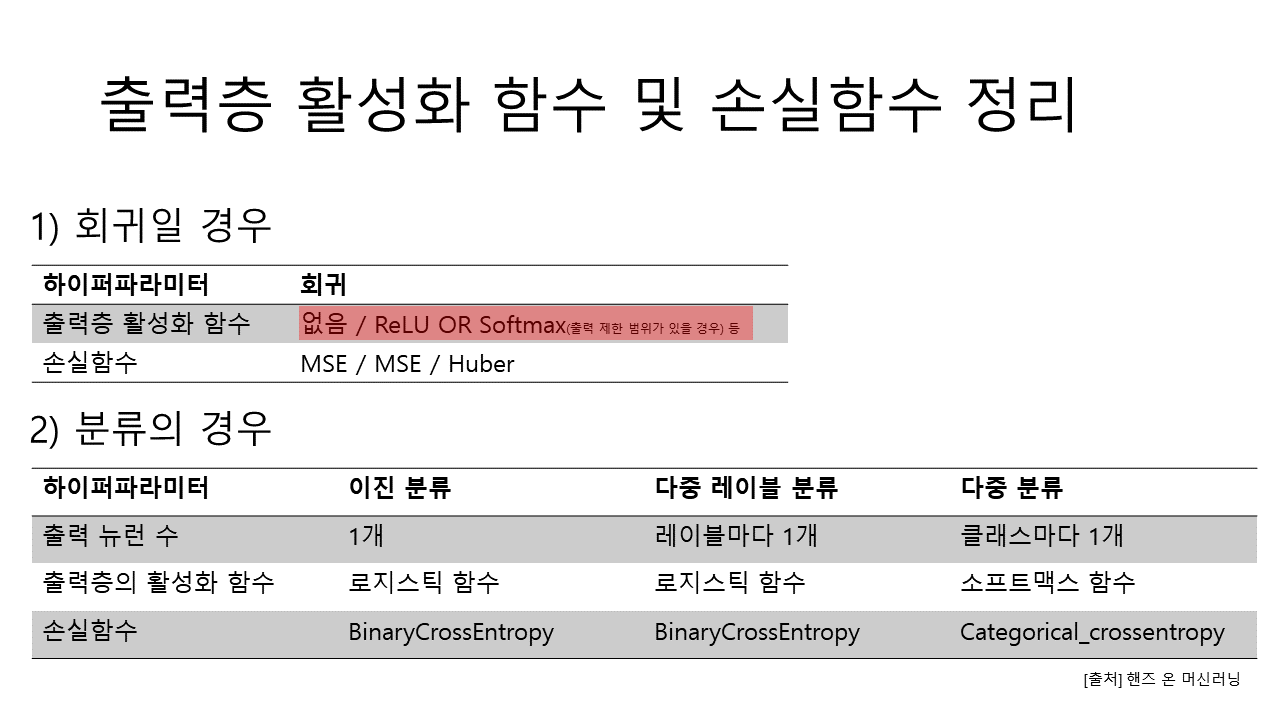

In [ ]:
# 힌트
from IPython.display import Image
Image('evalution3.png')

## 답:

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 64)                640       
_________________________________________________________________
dense2 (Dense)               (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


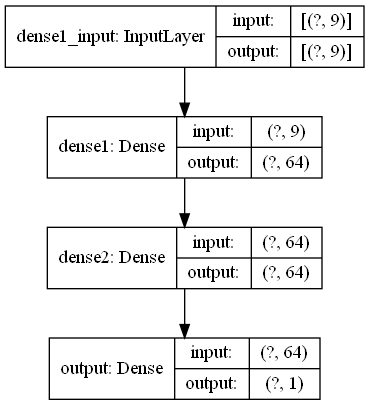

In [ ]:
# 다음과 같은 구조로 모델을 만든 것을 확인할 수 있어요!
plot_model(model,show_shapes=True)

In [ ]:
epochs = 1000
history = model.fit(normed_train_data, train_labels,
                   epochs = epochs, validation_split=0.2)

Epoch 1/1000
8/8 [==============================] - 0s 15ms/step - loss: 594.8194 - mae: 23.2498 - mse: 594.8194 - val_loss: 669.4206 - val_mae: 24.4614 - val_mse: 669.4206
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 559.5199 - mae: 22.5143 - mse: 559.5199 - val_loss: 634.7543 - val_mae: 23.7841 - val_mse: 634.7543
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 528.0643 - mae: 21.8526 - mse: 528.0643 - val_loss: 597.8702 - val_mae: 23.0554 - val_mse: 597.8702
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 493.5016 - mae: 21.1056 - mse: 493.5016 - val_loss: 555.1622 - val_mae: 22.1962 - val_mse: 555.1623
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 453.7175 - mae: 20.2219 - mse: 453.7175 - val_loss: 507.6060 - val_mae: 21.2035 - val_mse: 507.6060
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 409.9319 - mae: 19.2117 - mse: 409.9319 - val_loss: 455.4975 - val_

Epoch 99/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.8965 - mae: 1.6578 - mse: 4.8965 - val_loss: 11.4997 - val_mae: 2.3283 - val_mse: 11.4997
Epoch 100/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.8584 - mae: 1.6492 - mse: 4.8584 - val_loss: 13.5918 - val_mae: 2.5170 - val_mse: 13.5918
Epoch 101/1000
8/8 [==============================] - 0s 5ms/step - loss: 4.8691 - mae: 1.6544 - mse: 4.8691 - val_loss: 13.4995 - val_mae: 2.5080 - val_mse: 13.4995
Epoch 102/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.9344 - mae: 1.6660 - mse: 4.9344 - val_loss: 12.6845 - val_mae: 2.4234 - val_mse: 12.6845
Epoch 103/1000
8/8 [==============================] - 0s 2ms/step - loss: 4.7529 - mae: 1.6466 - mse: 4.7529 - val_loss: 13.6535 - val_mae: 2.5259 - val_mse: 13.6535
Epoch 104/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.9031 - mae: 1.6398 - mse: 4.9031 - val_loss: 13.4759 - val_mae: 2.4915 - val_mse: 13.4759
Epoch

8/8 [==============================] - 0s 3ms/step - loss: 3.7052 - mae: 1.4403 - mse: 3.7052 - val_loss: 12.3341 - val_mae: 2.3980 - val_mse: 12.3341
Epoch 198/1000
8/8 [==============================] - 0s 2ms/step - loss: 3.5097 - mae: 1.4035 - mse: 3.5097 - val_loss: 13.5429 - val_mae: 2.4492 - val_mse: 13.5429
Epoch 199/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.5510 - mae: 1.4189 - mse: 3.5510 - val_loss: 12.5559 - val_mae: 2.3788 - val_mse: 12.5559
Epoch 200/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6791 - mae: 1.4756 - mse: 3.6791 - val_loss: 12.4476 - val_mae: 2.3740 - val_mse: 12.4476
Epoch 201/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.5508 - mae: 1.4367 - mse: 3.5508 - val_loss: 13.8866 - val_mae: 2.4848 - val_mse: 13.8866
Epoch 202/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.5578 - mae: 1.4196 - mse: 3.5578 - val_loss: 12.7142 - val_mae: 2.3954 - val_mse: 12.7142
Epoch 203/1000
8/8 

8/8 [==============================] - 0s 2ms/step - loss: 2.8547 - mae: 1.2768 - mse: 2.8547 - val_loss: 15.3656 - val_mae: 2.5942 - val_mse: 15.3656
Epoch 296/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.8414 - mae: 1.2790 - mse: 2.8414 - val_loss: 13.7898 - val_mae: 2.4878 - val_mse: 13.7898
Epoch 297/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.7344 - mae: 1.2602 - mse: 2.7344 - val_loss: 13.3311 - val_mae: 2.4361 - val_mse: 13.3311
Epoch 298/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.7795 - mae: 1.2568 - mse: 2.7795 - val_loss: 12.9352 - val_mae: 2.4204 - val_mse: 12.9352
Epoch 299/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.7645 - mae: 1.2359 - mse: 2.7645 - val_loss: 14.9709 - val_mae: 2.5770 - val_mse: 14.9709
Epoch 300/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.7753 - mae: 1.2729 - mse: 2.7753 - val_loss: 14.3782 - val_mae: 2.5092 - val_mse: 14.3782
Epoch 301/1000
8/8 

8/8 [==============================] - 0s 3ms/step - loss: 2.3827 - mae: 1.1337 - mse: 2.3827 - val_loss: 14.0113 - val_mae: 2.4444 - val_mse: 14.0113
Epoch 394/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2363 - mae: 1.1145 - mse: 2.2363 - val_loss: 15.5684 - val_mae: 2.5929 - val_mse: 15.5684
Epoch 395/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3056 - mae: 1.1355 - mse: 2.3056 - val_loss: 14.3397 - val_mae: 2.4704 - val_mse: 14.3397
Epoch 396/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3459 - mae: 1.1634 - mse: 2.3459 - val_loss: 13.9812 - val_mae: 2.4403 - val_mse: 13.9812
Epoch 397/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3914 - mae: 1.1350 - mse: 2.3914 - val_loss: 14.0689 - val_mae: 2.4477 - val_mse: 14.0689
Epoch 398/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.4055 - mae: 1.1856 - mse: 2.4055 - val_loss: 14.8614 - val_mae: 2.5188 - val_mse: 14.8614
Epoch 399/1000
8/8 

8/8 [==============================] - 0s 4ms/step - loss: 1.9480 - mae: 1.0418 - mse: 1.9480 - val_loss: 14.6165 - val_mae: 2.4653 - val_mse: 14.6165
Epoch 492/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.9640 - mae: 1.0221 - mse: 1.9640 - val_loss: 14.7195 - val_mae: 2.4769 - val_mse: 14.7195
Epoch 493/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.0219 - mae: 1.0684 - mse: 2.0219 - val_loss: 16.0428 - val_mae: 2.5881 - val_mse: 16.0428
Epoch 494/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2647 - mae: 1.1535 - mse: 2.2647 - val_loss: 16.6301 - val_mae: 2.6393 - val_mse: 16.6301
Epoch 495/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.0181 - mae: 1.0624 - mse: 2.0181 - val_loss: 16.1227 - val_mae: 2.6171 - val_mse: 16.1227
Epoch 496/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.9869 - mae: 1.0428 - mse: 1.9869 - val_loss: 14.2948 - val_mae: 2.4946 - val_mse: 14.2948
Epoch 497/1000
8/8 

8/8 [==============================] - 0s 3ms/step - loss: 1.8678 - mae: 1.0141 - mse: 1.8678 - val_loss: 14.7026 - val_mae: 2.4604 - val_mse: 14.7026
Epoch 590/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.7628 - mae: 0.9858 - mse: 1.7628 - val_loss: 14.7188 - val_mae: 2.4652 - val_mse: 14.7188
Epoch 591/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.7458 - mae: 0.9885 - mse: 1.7458 - val_loss: 15.2106 - val_mae: 2.4904 - val_mse: 15.2106
Epoch 592/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.7777 - mae: 0.9839 - mse: 1.7777 - val_loss: 14.5413 - val_mae: 2.4396 - val_mse: 14.5413
Epoch 593/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.7405 - mae: 0.9795 - mse: 1.7405 - val_loss: 14.6343 - val_mae: 2.4841 - val_mse: 14.6343
Epoch 594/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.6990 - mae: 0.9576 - mse: 1.6990 - val_loss: 15.8574 - val_mae: 2.6200 - val_mse: 15.8574
Epoch 595/1000
8/8 

8/8 [==============================] - 0s 2ms/step - loss: 1.6162 - mae: 0.9446 - mse: 1.6162 - val_loss: 15.3188 - val_mae: 2.4900 - val_mse: 15.3188
Epoch 688/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.6339 - mae: 0.9453 - mse: 1.6339 - val_loss: 15.9107 - val_mae: 2.5089 - val_mse: 15.9107
Epoch 689/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5780 - mae: 0.9295 - mse: 1.5780 - val_loss: 14.2589 - val_mae: 2.4255 - val_mse: 14.2589
Epoch 690/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5664 - mae: 0.9304 - mse: 1.5664 - val_loss: 15.0390 - val_mae: 2.4679 - val_mse: 15.0390
Epoch 691/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.5588 - mae: 0.9077 - mse: 1.5588 - val_loss: 15.1752 - val_mae: 2.4606 - val_mse: 15.1752
Epoch 692/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5706 - mae: 0.9044 - mse: 1.5706 - val_loss: 14.7247 - val_mae: 2.4512 - val_mse: 14.7247
Epoch 693/1000
8/8 

8/8 [==============================] - 0s 4ms/step - loss: 1.3178 - mae: 0.8334 - mse: 1.3178 - val_loss: 15.3776 - val_mae: 2.4672 - val_mse: 15.3776
Epoch 786/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.4660 - mae: 0.8753 - mse: 1.4660 - val_loss: 15.4710 - val_mae: 2.4753 - val_mse: 15.4710
Epoch 787/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.3935 - mae: 0.8595 - mse: 1.3935 - val_loss: 15.9275 - val_mae: 2.4966 - val_mse: 15.9275
Epoch 788/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3963 - mae: 0.8648 - mse: 1.3963 - val_loss: 16.0359 - val_mae: 2.5245 - val_mse: 16.0359
Epoch 789/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3636 - mae: 0.8611 - mse: 1.3636 - val_loss: 15.0683 - val_mae: 2.4612 - val_mse: 15.0683
Epoch 790/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.4733 - mae: 0.8827 - mse: 1.4733 - val_loss: 15.1131 - val_mae: 2.4182 - val_mse: 15.1131
Epoch 791/1000
8/8 

8/8 [==============================] - 0s 4ms/step - loss: 1.2382 - mae: 0.8209 - mse: 1.2382 - val_loss: 16.5302 - val_mae: 2.5202 - val_mse: 16.5302
Epoch 884/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.3573 - mae: 0.8355 - mse: 1.3573 - val_loss: 16.6615 - val_mae: 2.5440 - val_mse: 16.6615
Epoch 885/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.2726 - mae: 0.8168 - mse: 1.2726 - val_loss: 15.3058 - val_mae: 2.4501 - val_mse: 15.3058
Epoch 886/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.2944 - mae: 0.8203 - mse: 1.2944 - val_loss: 16.3516 - val_mae: 2.5349 - val_mse: 16.3516
Epoch 887/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.3425 - mae: 0.8441 - mse: 1.3425 - val_loss: 16.0305 - val_mae: 2.5911 - val_mse: 16.0305
Epoch 888/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3283 - mae: 0.8516 - mse: 1.3283 - val_loss: 16.3019 - val_mae: 2.5245 - val_mse: 16.3019
Epoch 889/1000
8/8 

8/8 [==============================] - 0s 4ms/step - loss: 1.3317 - mae: 0.8174 - mse: 1.3317 - val_loss: 15.4965 - val_mae: 2.4448 - val_mse: 15.4965
Epoch 982/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.1702 - mae: 0.7820 - mse: 1.1702 - val_loss: 16.0934 - val_mae: 2.5110 - val_mse: 16.0934
Epoch 983/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.2673 - mae: 0.8103 - mse: 1.2673 - val_loss: 16.1106 - val_mae: 2.5154 - val_mse: 16.1106
Epoch 984/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.1527 - mae: 0.7728 - mse: 1.1527 - val_loss: 16.6500 - val_mae: 2.5514 - val_mse: 16.6500
Epoch 985/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.2959 - mae: 0.8142 - mse: 1.2959 - val_loss: 15.8666 - val_mae: 2.5116 - val_mse: 15.8666
Epoch 986/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.1430 - mae: 0.7675 - mse: 1.1430 - val_loss: 15.5757 - val_mae: 2.5194 - val_mse: 15.5757
Epoch 987/1000
8/8 

In [ ]:
# 어떤 정보들이 history에 있는지 확인해봐요!
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,594.819397,23.249813,594.819397,669.420593,24.461433,669.420593,0
1,559.519897,22.514330,559.519897,634.754333,23.784113,634.754333,1
2,528.064331,21.852600,528.064331,597.870178,23.055397,597.870178,2
3,493.501587,21.105618,493.501587,555.162231,22.196177,555.162292,3
4,453.717468,20.221876,453.717468,507.606018,21.203499,507.606018,4
...,...,...,...,...,...,...,...
995,1.122810,0.752234,1.122810,15.465251,2.444613,15.465251,995
996,1.267874,0.794024,1.267874,16.804228,2.577830,16.804228,996
997,1.188966,0.754461,1.188966,18.045031,2.672728,18.045031,997
998,1.166815,0.808722,1.166815,16.039312,2.504628,16.039312,998


## 이것으로 딥러닝으로 회귀문제도 해결했습니다!

# 3. Fashin MNIST 분류하기

- 연습삼아 코드 작성하는 부분이 좀 더 많아요! 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

## 교재 예제 코드와 비슷한 Fashin MNIST 데이터를 사용하겠습니다!

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print("Training data shape : ", train_input.shape)
print("Training label shape : ",train_target.shape)
print("Testing data shape : ", test_input.shape)
print("Testing label shape : ", test_target.shape)

Training data shape :  (60000, 28, 28)
Training label shape :  (60000,)
Testing data shape :  (10000, 28, 28)
Testing label shape :  (10000,)


## 아래와 같이 정규화 데이터 분리를 진행하겠습니다~

In [ ]:
from sklearn.model_selection import train_test_split

train_input = train_input.reshape(60000, 28*28).astype('float32')/255.0
test_input = test_input.reshape(10000, 28*28).astype('float32')/255.0
train_target = keras.utils.to_categorical(train_target, 10)
test_target = keras.utils.to_categorical(test_target, 10)
tf.random.set_seed(3)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

## 문제 3.1.

![](https://images.velog.io/images/sgh9702/post/02308658-61ce-46a7-b741-858b60872f6c/1.jpg)

위의 설계도를 보고 model 객체를 코드로 작성해주세요

조건 : hidden3에서의 dropout 비율은 0.25로 해주세요

다른 매개변수들은 자유롭게 작성해주셔도 됩니다(문맥상 맞으면 됩니다) ex)활성화함수

In [ ]:
##문제 3.1. 답안

Model: "myFasionMnistModel_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 512)               401920    
_________________________________________________________________
hidden2 (Dense)              (None, 256)               131328    
_________________________________________________________________
hidden3 (Dense)              (None, 24)                6168      
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
output (Dense)               (None, 10)                250       
Total params: 539,666
Trainable params: 539,666
Non-trainable params: 0
_________________________________________________________________


## 문제 3.2.

아래 빈칸의 optimizer 와 loss를 입력해주세요 (의미만 맞으면 됩니다)

In [ ]:
##문제3.2. 답안
model.compile(optimizer='', loss='', metrics=['accuracy'])

## 문제 3.3.

모델은 model1.h5 파일을 만들고 저장해 주세요

In [ ]:
##문제 3.3.번 답안


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('model1.h5')

### (다음 주의 과대적합 부분입니다 참고만 하세요!) 검증데이터의 loss값이 증가하는 현상을 1번은 참을수 있게하겠습니다

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_cb = EarlyStopping(patience=,restore_best_weights=True)

### (다음 주의 과대적합 부분입니다 참고만 하세요!) 학습데이터를 학습한 횟수를 10번으로 설정하겠습니다.

In [ ]:
from tensorflow.keras import callbacks
history = model.fit(train_scaled, train_target, epochs=,validation_split=0.3,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.7028 - accuracy: 0.7564 - val_loss: 0.4572 - val_accuracy: 0.8342
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4679 - accuracy: 0.8373 - val_loss: 0.4461 - val_accuracy: 0.8315
Epoch 3/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.4171 - accuracy: 0.8543 - val_loss: 0.3966 - val_accuracy: 0.8551
Epoch 4/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3879 - accuracy: 0.8642 - val_loss: 0.3460 - val_accuracy: 0.8789
Epoch 5/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.3579 - accuracy: 0.8721 - val_loss: 0.4138 - val_accuracy: 0.8594


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8769


[0.34439030289649963, 0.8769166469573975]

In [ ]:
print(early_stopping_cb.stopped_epoch)

4


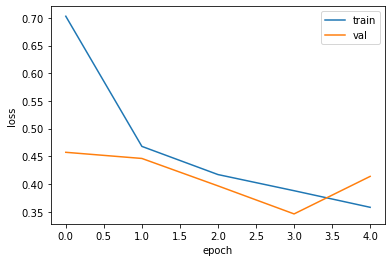

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_input, test_target)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.8660
Test loss: 0.373
Test accuracy: 0.866


## 문제 3.4. 제공해 드린 model2.h5을 활용해 보겠습니다 model2.h5를 불러와주세요. 객체저장은 model2로 해주세요

In [ ]:
##문제3.4.번 답안 - 한 줄로 작성해주시면 됩니다!


In [ ]:
model2.summary()

Model: "myFasionMnistModel_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
hidden2 (Dense)              (None, 512)               524800    
_________________________________________________________________
hidden3 (Dense)              (None, 256)               131328    
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


## 문제 3.5. 저희가 만든 각각의 은닉층에서의 params가 어떻게 도출되었는지 설명해주세요
#### - 각각 은닉층에서 param 개수가 어떻게 나오는지 설명해주세요 
#### 예. (hidden3) 256 x 512 + 256 = 131328

문제 3.7. 답안 <br>

hidden1 : <br>

hidden2 : <br>

hidden3 : <br>

수고하셨습니다~!